<a href="https://colab.research.google.com/github/bharat-mullapudi/LSTM_SOC_RUL/blob/main/goodreults_att2dec17R3implementation_1_SOC_LSTM_CALCE_IC2_0deg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns


In [39]:
df = pd.read_excel('/content/drive/MyDrive/LSTM_SOC_Implementation/calce_incremental_INR_18650-20R/Incremental_temp_0.xlsx')

In [ ]:
df

,Test_Time(s),Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),TimeDelta,SOC
0,10.000502,1.0,0.0,4.173664,0.0,0.0,1,0.97
1,20.016109,1.0,0.0,4.173664,0.0,0.0,10.0156,0.984508
2,30.031595,1.0,0.0,4.173826,0.0,0.0,10.0155,0.984604
3,40.047191,1.0,0.0,4.173826,0.0,0.0,10.0156,0.984604
4,50.062737,1.0,0.0,4.173826,0.0,0.0,10.0155,0.984604
...,...,...,...,...,...,...,...,...
1048568,NaN,NaN,NaN,NaN,NaN,NaN,,
1048569,NaN,NaN,NaN,NaN,NaN,NaN,,
1048570,NaN,NaN,NaN,NaN,NaN,NaN,,
1048571,NaN,NaN,NaN,NaN,NaN,NaN,,


In [40]:
df=df.dropna()

In [41]:
combined_data=df

In [42]:
combined_data.to_csv('Incremental_Init_0.csv')
combined_data=pd.read_csv('Incremental_Init_0.csv')

In [43]:
combined_data.describe()

,Unnamed: 0,Test_Time(s),Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),TimeDelta,SOC
count,157570.000000,157570.000000,157570.000000,157570.000000,157570.000000,157570.000000,157570.000000,157570.000000,157570.000000
mean,78784.500000,86648.264899,10.490157,-0.000120,3.756622,0.519926,1.392800,1.055854,0.736358
std,45486.685295,46052.526517,5.748668,0.280592,0.209131,0.616112,0.556578,0.628872,0.121619
min,0.000000,10.000019,1.000000,-1.000412,2.577044,0.000000,0.000000,0.000000,0.045320
25%,39392.250000,46807.431234,5.000000,0.000000,3.600780,0.021223,0.902758,1.015400,0.646755
50%,78784.500000,86664.620077,11.000000,0.000000,3.694451,0.136850,1.805571,1.015584,0.701856
75%,118176.750000,126522.511848,16.000000,0.000000,3.950466,1.104041,1.805571,1.015615,0.851428
max,157569.000000,166379.962373,19.000000,0.999904,4.262149,1.819286,1.805571,10.017561,1.000000


In [ ]:
###
combined_data=combined_data.drop_duplicates()
#combined_data.set_index('Data_Point',inplace=True)
#cd2=combined_data.drop(63990)
#cdcombined_data.drop(127979)

#cd2=combined_data;

In [44]:
combined_data

,Unnamed: 0,Test_Time(s),Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),TimeDelta,SOC
0,0,10.000019,1.0,0.0,4.163778,0.000000,0.000000,1.000000,0.970000
1,1,20.015468,1.0,0.0,4.163778,0.000000,0.000000,10.015450,0.978693
2,2,30.030954,1.0,0.0,4.163778,0.000000,0.000000,10.015485,0.978693
3,3,40.046428,1.0,0.0,4.163778,0.000000,0.000000,10.015474,0.978693
4,4,50.061910,1.0,0.0,4.163940,0.000000,0.000000,10.015482,0.978788
...,...,...,...,...,...,...,...,...,...
157565,157565,166376.509256,19.0,0.0,4.163454,1.819286,1.805571,1.015608,0.978502
157566,157566,166377.524866,19.0,0.0,4.163616,1.819286,1.805571,1.015610,0.978598
157567,157567,166378.540471,19.0,0.0,4.163616,1.819286,1.805571,1.015605,0.978598
157568,157568,166379.556097,19.0,0.0,4.163616,1.819286,1.805571,1.015626,0.978598


In [45]:
combined_data=combined_data.iloc[:,1:] #drop first column
combined_data.shape
combined_data

,Test_Time(s),Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),TimeDelta,SOC
0,10.000019,1.0,0.0,4.163778,0.000000,0.000000,1.000000,0.970000
1,20.015468,1.0,0.0,4.163778,0.000000,0.000000,10.015450,0.978693
2,30.030954,1.0,0.0,4.163778,0.000000,0.000000,10.015485,0.978693
3,40.046428,1.0,0.0,4.163778,0.000000,0.000000,10.015474,0.978693
4,50.061910,1.0,0.0,4.163940,0.000000,0.000000,10.015482,0.978788
...,...,...,...,...,...,...,...,...
157565,166376.509256,19.0,0.0,4.163454,1.819286,1.805571,1.015608,0.978502
157566,166377.524866,19.0,0.0,4.163616,1.819286,1.805571,1.015610,0.978598
157567,166378.540471,19.0,0.0,4.163616,1.819286,1.805571,1.015605,0.978598
157568,166379.556097,19.0,0.0,4.163616,1.819286,1.805571,1.015626,0.978598


In [46]:
#combined_data.to_csv('cd.csv')
#files.download('cd.csv')

In [47]:
combined_data=combined_data.drop(columns=['Charge_Capacity(Ah)','Discharge_Capacity(Ah)','TimeDelta'])

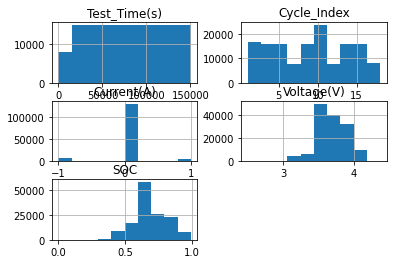

<Figure size 1440x1440 with 0 Axes>

In [11]:
combined_data.hist()
plt.figure(figsize=(20,20))
plt.show()

In [48]:
combined_data=combined_data.drop(columns=['Test_Time(s)'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff4ce1f1310>,
      dtype=object)

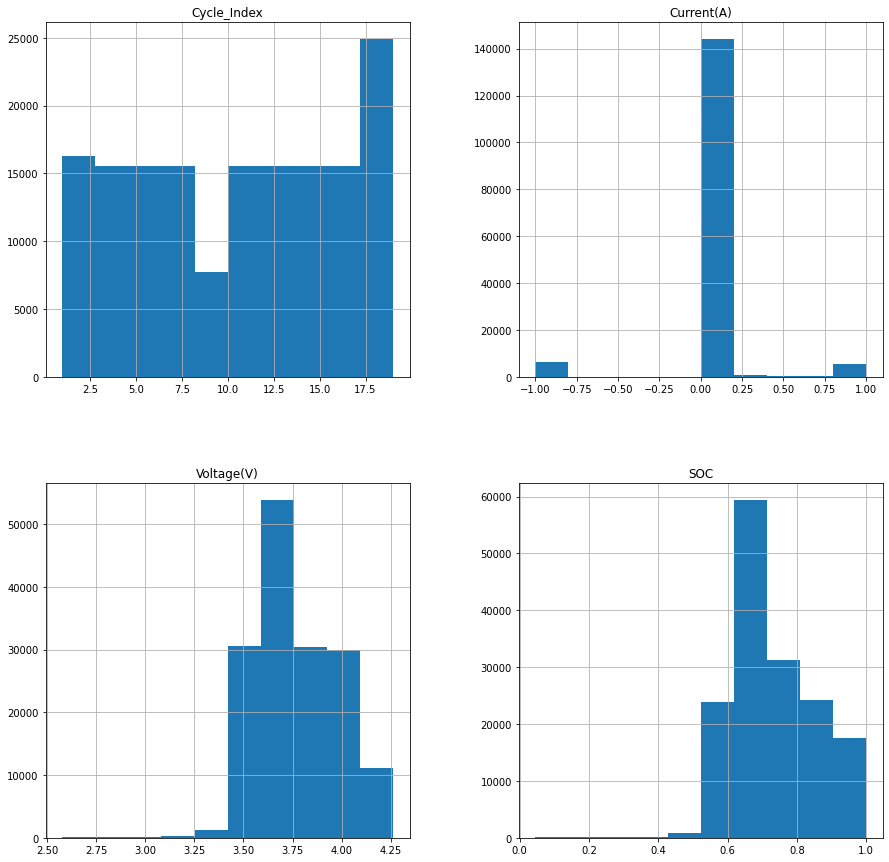

In [49]:
  fig = plt.figure(figsize = (15,15))
  ax = fig.gca()
  combined_data.hist(ax = ax)

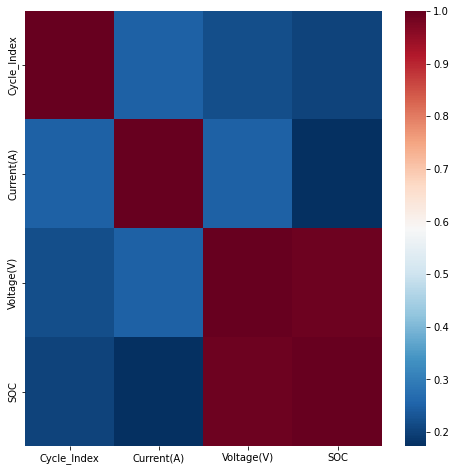

In [50]:
correlations = combined_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlations, cmap='RdBu_r')
plt.show()

In [51]:
combined_data.describe()

,Cycle_Index,Current(A),Voltage(V),SOC
count,157570.000000,157570.000000,157570.000000,157570.000000
mean,10.490157,-0.000120,3.756622,0.736358
std,5.748668,0.280592,0.209131,0.121619
min,1.000000,-1.000412,2.577044,0.045320
25%,5.000000,0.000000,3.600780,0.646755
50%,11.000000,0.000000,3.694451,0.701856
75%,16.000000,0.000000,3.950466,0.851428
max,19.000000,0.999904,4.262149,1.000000


Deleting 0 valued columns

In [52]:
#cd2=pd.read_csv('/content/drive/MyDrive/LSTM_SOC_Implementation/r1.csv')
cd2=combined_data
cd2.describe()

,Cycle_Index,Current(A),Voltage(V),SOC
count,157570.000000,157570.000000,157570.000000,157570.000000
mean,10.490157,-0.000120,3.756622,0.736358
std,5.748668,0.280592,0.209131,0.121619
min,1.000000,-1.000412,2.577044,0.045320
25%,5.000000,0.000000,3.600780,0.646755
50%,11.000000,0.000000,3.694451,0.701856
75%,16.000000,0.000000,3.950466,0.851428
max,19.000000,0.999904,4.262149,1.000000


In [53]:
cd2

,Cycle_Index,Current(A),Voltage(V),SOC
0,1.0,0.0,4.163778,0.970000
1,1.0,0.0,4.163778,0.978693
2,1.0,0.0,4.163778,0.978693
3,1.0,0.0,4.163778,0.978693
4,1.0,0.0,4.163940,0.978788
...,...,...,...,...
157565,19.0,0.0,4.163454,0.978502
157566,19.0,0.0,4.163616,0.978598
157567,19.0,0.0,4.163616,0.978598
157568,19.0,0.0,4.163616,0.978598


In [54]:
y = cd2.SOC
X = cd2.drop(['SOC'], axis=1)

In [55]:
X.describe()

,Cycle_Index,Current(A),Voltage(V)
count,157570.000000,157570.000000,157570.000000
mean,10.490157,-0.000120,3.756622
std,5.748668,0.280592,0.209131
min,1.000000,-1.000412,2.577044
25%,5.000000,0.000000,3.600780
50%,11.000000,0.000000,3.694451
75%,16.000000,0.000000,3.950466
max,19.000000,0.999904,4.262149


split

In [56]:
cd2.values

array([[ 1.        ,  0.        ,  4.16377831,  0.97      ],
       [ 1.        ,  0.        ,  4.16377831,  0.97869312],
       [ 1.        ,  0.        ,  4.16377831,  0.97869312],
       ...,
       [19.        ,  0.        ,  4.16361618,  0.97859775],
       [19.        ,  0.        ,  4.16361618,  0.97859775],
       [19.        ,  0.        ,  4.16361618,  0.97859775]])

In [57]:
from sklearn.preprocessing import MinMaxScaler


In [58]:
dataset = cd2.SOC.values #numpy.ndarray
dataset = dataset.astype('float64')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [59]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [60]:
# reshape into X=t and Y=t+1
look_back = 3

X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

In [61]:
X_train

array([[0.96857586, 0.97768166, 0.97768166],
       [0.97768166, 0.97768166, 0.97768166],
       [0.97768166, 0.97768166, 0.97778155],
       ...,
       [0.8012376 , 0.8012376 , 0.8012376 ],
       [0.8012376 , 0.8012376 , 0.8012376 ],
       [0.8012376 , 0.8012376 , 0.80113771]])

In [62]:
X_train.shape

(126052, 3)

In [63]:
Y_train.shape

(126052,)

In [64]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [65]:
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

In [66]:
model = Sequential()
#model.add(LSTM(,return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=100, batch_size=64, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=50)], verbose=1, shuffle=False)

# Training Phase
model.summary()

Epoch 1/100
1970/1970 [==============================] - 13s 5ms/step - loss: 0.0204 - val_loss: 4.5202e-04
Epoch 2/100
1970/1970 [==============================] - 9s 5ms/step - loss: 0.0014 - val_loss: 8.9746e-04
Epoch 3/100
1970/1970 [==============================] - 9s 5ms/step - loss: 9.3809e-04 - val_loss: 0.0014
Epoch 4/100
1970/1970 [==============================] - 8s 4ms/step - loss: 7.3471e-04 - val_loss: 0.0018
Epoch 5/100
1970/1970 [==============================] - 9s 4ms/step - loss: 6.1824e-04 - val_loss: 0.0017
Epoch 6/100
1970/1970 [==============================] - 9s 4ms/step - loss: 5.3783e-04 - val_loss: 0.0017
Epoch 7/100
1970/1970 [==============================] - 8s 4ms/step - loss: 4.5618e-04 - val_loss: 0.0016
Epoch 8/100
1970/1970 [==============================] - 9s 4ms/step - loss: 3.6435e-04 - val_loss: 0.0015
Epoch 9/100
1970/1970 [==============================] - 9s 5ms/step - loss: 2.7029e-04 - val_loss: 0.0015
Epoch 10/100
1970/1970 [============

In [67]:
# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

Train Mean Absolute Error: 0.03011785580006494
Train Root Mean Squared Error: 0.03234137001964692
Test Mean Absolute Error: 0.026857875222775756
Test Root Mean Squared Error: 0.03471642806275569


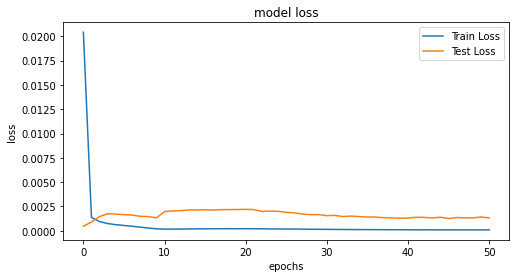

In [68]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

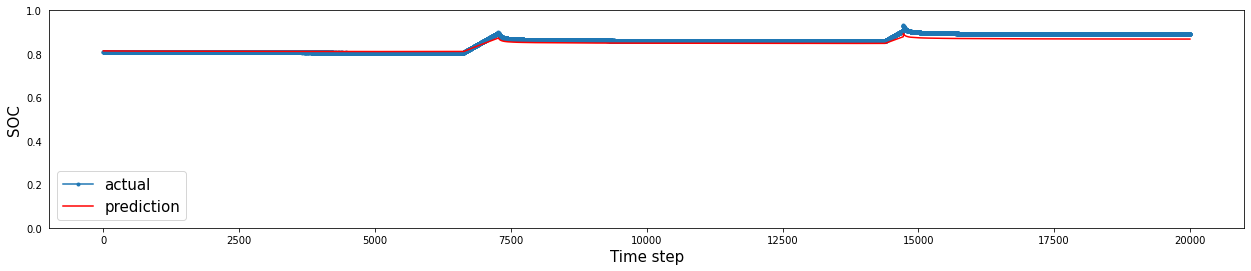

In [69]:
aa=[x for x in range(20000)]
plt.figure(figsize=(20,4))
plt.plot(aa, Y_test[0][:20000], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:20000], 'r', label="prediction")
plt.tick_params(left=False, labelleft=True) #remove ticks
#plt.tight_layout()
#sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('SOC', size=15)
plt.ylim((0,1))
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

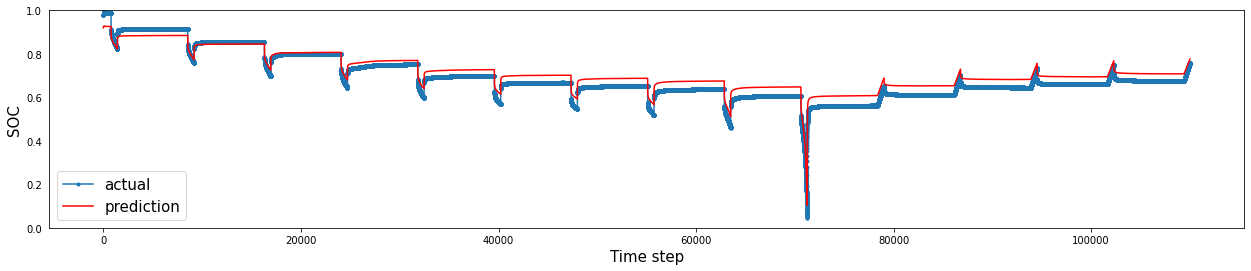

In [70]:
aa=[x for x in range(110000)]
plt.figure(figsize=(20,4))
plt.plot(aa, Y_train[0][:110000], marker='.', label="actual")
plt.plot(aa, train_predict[:,0][:110000], 'r', label="prediction")
plt.tick_params(left=False, labelleft=True) #remove ticks
#plt.tight_layout()
#sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('SOC', size=15)
plt.ylim((0,1))
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();